# Comparing Multiple Summaries

## Install widgets and import libraries

Note: Make sure you installed the ipython widgets as well as all the requirements.
You can read more information on installing widgets here: https://ipywidgets.readthedocs.io/en/latest/user_install.html

The commented cell below has commands that are supposed to be run in a shell, not through the notebook. Running them here might lead to privilege issues.

In [1]:
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install jupyter_contrib_nbextensions
!pip install --upgrade autopep8
!jupyter contrib nbextension install --user
# !pip install missingno

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Requirement already up-to-date: autopep8 in /Users/macbook/PycharmProjects/dashboard/venv3/lib/python3.7/site-packages (1.5)
[I 17:42:58 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 17:42:58 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 17:42:58 InstallContribNbextensionsApp] Installing /Users/macbook/PycharmProjects/dashboard/venv3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/rubberband -> rubberband
[I 17:42:58 InstallContribNbextensionsApp] Up to date: /Users/macbook/Library/Jupyter/nbextensions/rubberband/icon.png
[I 17:42:58 InstallContribNbextensionsApp] Up to date: /Users/macbook/Library/Jupyter/nbextensions/rubberband/main.css
[I 17:42:58 InstallContribNbextensionsApp] Up to date: /Users/macbook/Library/Jupyter/nbextensions/rubberband/readme.md
[I 17:42:58 InstallContribNbextensionsApp] Up to date: /Users/macbook/Library/Jupyter/nbextensions/rubberban

[I 17:42:58 InstallContribNbextensionsApp] Up to date: /Users/macbook/Library/Jupyter/nbextensions/printview/printview.yaml
[I 17:42:58 InstallContribNbextensionsApp] - Validating: OK
[I 17:42:58 InstallContribNbextensionsApp] Installing /Users/macbook/PycharmProjects/dashboard/venv3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/export_embedded -> export_embedded
[I 17:42:58 InstallContribNbextensionsApp] Up to date: /Users/macbook/Library/Jupyter/nbextensions/export_embedded/export_embedded.yaml
[I 17:42:58 InstallContribNbextensionsApp] Up to date: /Users/macbook/Library/Jupyter/nbextensions/export_embedded/icon.png
[I 17:42:58 InstallContribNbextensionsApp] Up to date: /Users/macbook/Library/Jupyter/nbextensions/export_embedded/readme.md
[I 17:42:58 InstallContribNbextensionsApp] Up to date: /Users/macbook/Library/Jupyter/nbextensions/export_embedded/main.js
[I 17:42:58 InstallContribNbextensionsApp] - Validating: OK
[I 17:42:58 InstallContribNbextensionsApp]

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import missingno as msno

## Load data into pandas

Here, we load all the csv data in the `folder` variable. **The folder must contain ONLY CSV files which you want to compare/load. Please select a folder which contains outputs of the same API (e.g. summary). Hidden files are excluded.**
After all the csv files in the folder have been loaded as dataframes in a list named `df_list`, all of the files are loaded in a master dataframe called `df`.
The script counts the number of impressions collected for each user, and prints them, as well as the total number of dataframes generated, the total impressions collected and the mean of the impressions collected per user.

In [3]:
df_list = []
names_list = []
# folder is the relative or absolute path to the folder that contains only csv files
folder = '../outputs/fb/summary'

# get a list of absolute file paths for csv files


def absoluteFilePaths(directory):
    for dirpath, _, filenames in os.walk(directory):
        for f in filenames:
            if str(f)[0] == '.':
                pass
            else:
                yield os.path.abspath(os.path.join(dirpath, f))


def importFiles(folder):
    files = absoluteFilePaths(folder)
    # cycle through the files in the folder selected, import the csv and add the dataframe to the list of dataframes,
    # the pseudo-username to the list, and print out impressions generated for the user, then the total number of files
    for f in files:
        df = pd.read_csv(f)
        name = df['user'][0]
        names_list.append(name)
        df_list.append(df)
        print('Impressions collected for '+name+': '+str(len(df.index)))
    print('Total dataframes generated: '+str(len(df_list)))

    # concatenate all the dataframes in the list to get a master dataframe indexed by impressionTime and username
    df = pd.concat(df_list)
    print('Total impressions collected: '+str(len(df)))
    mean = len(df)/len(df_list)
    print('Impressions collected mean: '+str(mean))
    df['impressionTime'] = pd.to_datetime(df['impressionTime'])
    df = df.set_index('impressionTime', 'user')
    
    return df_list, names_list, df


df_list, names_list, df = importFiles(folder)

Impressions collected for gelato-pizza-zucchini: 16289
Impressions collected for eggs-macaroon-pretzel: 16754
Impressions collected for fennel-tea-lime: 14512
Impressions collected for mango-macaroons-macaroni: 17202
Impressions collected for yams-pomelo-guava: 18530
Impressions collected for yolk-carnitas-date: 17596
Impressions collected for pickles-coleslaw-rhubarb: 14338
Impressions collected for asparagus-croissant-kiwi: 15184
Impressions collected for vanilla-bokchoy-corn: 13339
Impressions collected for coleslaw-ceviche-broccoli: 15526
Impressions collected for parsnip-lentils-fudge: 14244
Impressions collected for waffle-hamburger-souffle: 14659
Impressions collected for quince-peanut-molasses: 10760
Impressions collected for croissant-watercress-pudding: 13756
Impressions collected for kale-sushi-eggs: 15179
Impressions collected for coconut-fudge-mandarin: 15772
Impressions collected for pimiento-cranberry-samosa: 13093
Impressions collected for vinegar-arrugula-biscuit: 1460

## Data exploration

### Check for missing data with MissingNo

MissingNo allows to visualize missing data (the white parts), so we can decide which columns we want to drop.

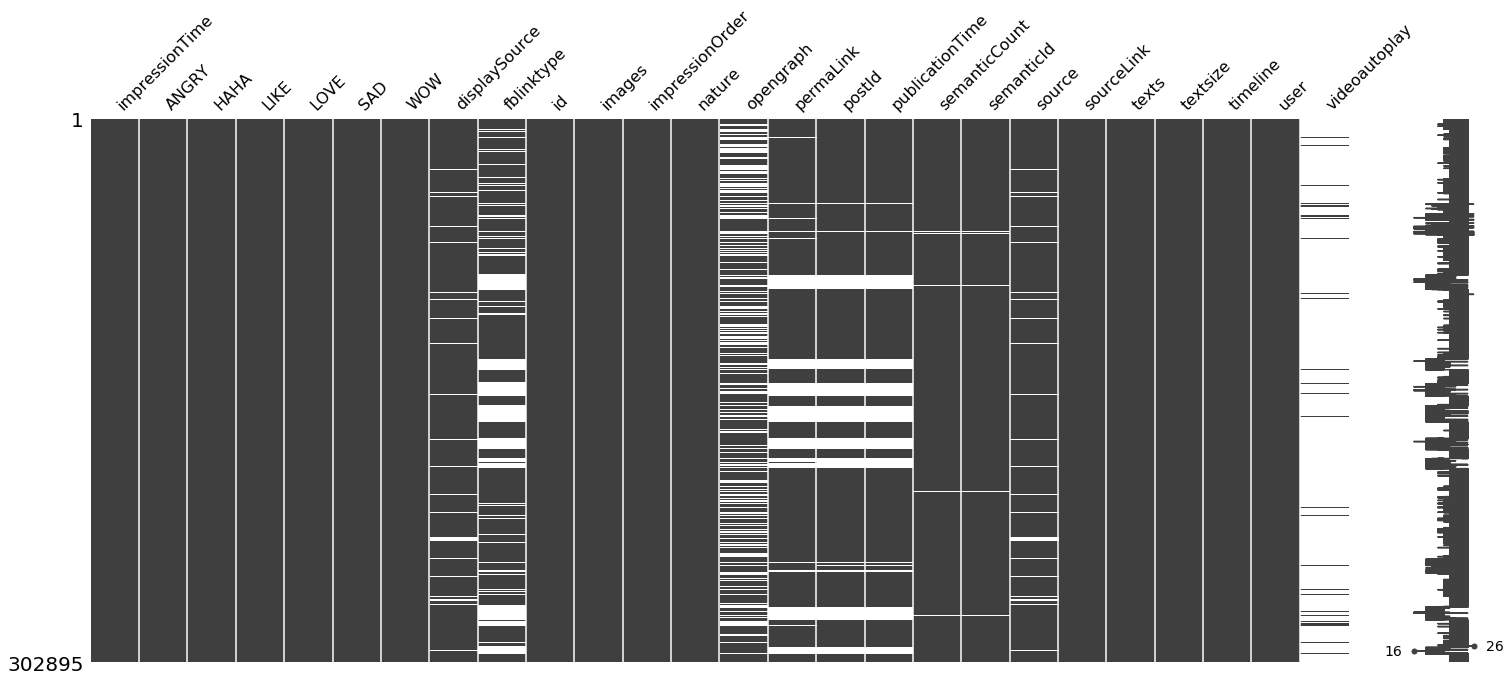

In [4]:
# %matplotlib inline
df = df.reset_index()
msno.matrix(df)
df = df.set_index('impressionTime', 'user')

### Total Impressions per user

We want to check whether or not the users have collected a similar number of impressions (posts), so we plot them. We might notice that some user has collected more impressions than others.

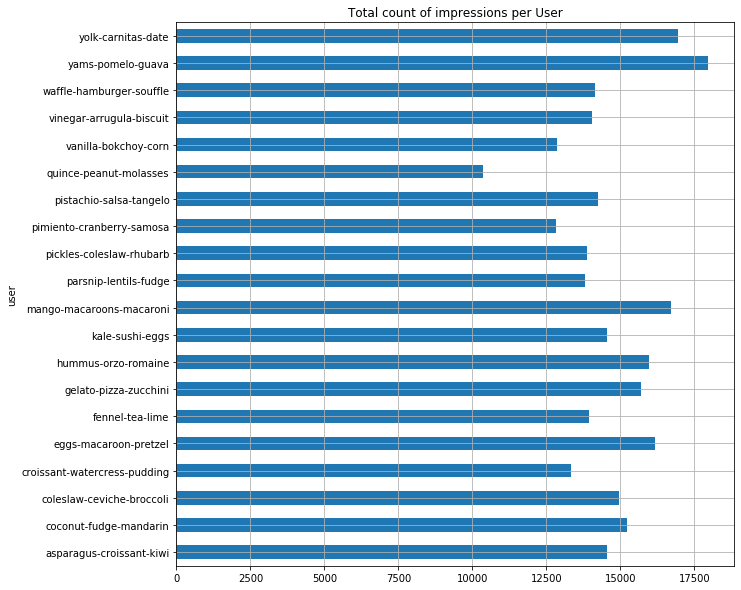

In [5]:
# count total impressions per user
total_count = df.groupby(['user'])['source'].count()

# plot total count of impressions per user
total_count.plot(kind='barh', figsize=(10, 10), grid=True,
                 title='Total count of impressions per User')

### Impression count per user in time

Let's take a closer look to the impression collected per day by the users. A function groups the data by day and user, then counts the total number of posts per day per user. An interactive visualization is served, where you can select the username from a list, and a filtered dataframe is returned as a bar chart.

In [6]:
def impressionCountUserTime(df):
    df.index = df.index.rename('impressionTime')
    df.index = df.index.floor('1D')
#     df.index = df.index.date
    df = df.groupby(['impressionTime', 'user'])['id'].count()
    df = df.reset_index(level=1)
    df.index = df.index.date
    @interact
    def show_plot(user=df['user'].unique()):
        mask = (df['user'] == user)
        return df.loc[mask].plot(kind='bar',
                                 figsize=(10, 10)
                                 )


impressionCountUserTime(df)

interactive(children=(Dropdown(description='user', options=('mango-macaroons-macaroni', 'croissant-watercress-…

## Data Cleaning

Now that we have a better idea of what needs to be cleaned, we can start cleaning data according to our needs. We will try to generalize as much as we can, in order to be able to re-use the code in other cases.

### Make timeframe consistent across different user dataframes

In [7]:
# function that returns maximum common start date and minimum common end date as pd.DateTime objects
def minMaxDates(df_list):
    mindates = []
    maxdates = []
    for df in df_list:
        df.impressionTime = pd.to_datetime(df.impressionTime)
        minimum = df.impressionTime.min()
        maximum = df.impressionTime.max()
        mindates.append(minimum)
        maxdates.append(maximum)
    start = max(mindates)
    end = min(maxdates)
    return start, end

# function that trims a summary dataframe


def consistentTimeframe(df_list, df):
    start, end = minMaxDates(df_list)
    df = df[(df['impressionTime'] >= start) & (df['impressionTime'] <= end)]
    return df


df = df.reset_index()
df = consistentTimeframe(df_list, df)
# df = df.set_index(['impressionTime', 'user'])

### Drop unnecessary columns

In [8]:
columns_to_drop = ['videoautoplay', 'opengraph']

df = df.drop(columns=columns_to_drop)

## Make Comparisons between user newsfeeds

After importing and cleaning our dataframes, we want to explore the data with some preparation and visualizations.

### Distribution of source per user

In [9]:
# count number of times each source has been seen per user
source_count = df.groupby(['user'])['source'].value_counts().rename(
    columns={'source': 'page_name'}).reset_index()
source_count.columns = ['user', 'source', 'count']

# generate a list of dataframes with the top 10 sources for each user
@interact
def sourcesPieChart(top=15, user=df['user'].unique()):
    df = source_count[source_count.user == user].nlargest(top, 'count')
    df = df.set_index('source')
    return df.plot(
        kind='pie',
        y='count',
        title=user,
        autopct='%1.1f%%',
        legend=False,
        startangle=90,
        figsize=(10, 10)
    )

interactive(children=(IntSlider(value=15, description='top', max=45, min=-15), Dropdown(description='user', op…

### Source count per user in time

In [10]:
def sourceCountUserTime(df):
    df.index = df.index.rename('impressionTime')
    df.index = df.index.floor('1D')
    df = df.groupby(['impressionTime', 'user', 'source'])['source'].count()
    df = df.rename(columns={'source': 'count'})
    df = df.reset_index()
    df.columns = ['impressionTime', 'user', 'source', 'count']
    df = df.set_index('impressionTime')
    df.index = df.index.date

    @interact
    def show_plot(user=df['user'].unique(), source=df['source'].unique()):
        mask = (df['user'] == user) & (df['source'] == source)
        return df.loc[mask].plot(kind='bar',
                                 figsize=(10, 10),
                                 grid=True
                                 )


df = df.set_index('impressionTime')
sourceCountUserTime(df)

                           ANGRY   HAHA    LIKE   LOVE  SAD  WOW  \
impressionTime                                                     
2019-12-29 00:00:00+00:00    0.0    0.0   163.0    0.0  0.0  0.0   
2019-12-29 00:00:00+00:00    0.0    0.0    11.0    0.0  3.0  5.0   
2019-12-29 00:00:00+00:00    0.0    0.0    37.0    0.0  4.0  4.0   
2019-12-29 00:00:00+00:00    0.0    0.0    44.0    3.0  0.0  0.0   
2019-12-29 00:00:00+00:00    0.0    0.0     0.0    0.0  0.0  0.0   
...                          ...    ...     ...    ...  ...  ...   
2019-10-23 00:00:00+00:00   55.0   25.0   114.0    0.0  0.0  0.0   
2019-10-23 00:00:00+00:00    0.0    5.0    40.0    0.0  0.0  0.0   
2019-10-23 00:00:00+00:00    0.0  158.0  9300.0  621.0  0.0  0.0   
2019-10-23 00:00:00+00:00    0.0  317.0  8600.0  490.0  0.0  0.0   
2019-10-23 00:00:00+00:00    0.0   14.0   161.0    6.0  0.0  0.0   

                                                          displaySource  \
impressionTime                          

interactive(children=(Dropdown(description='user', options=('asparagus-croissant-kiwi', 'coconut-fudge-mandari…

### Multiple sources count for single user in time

In [11]:
good_sources = [
    'Lega - Salvini Premier',
    'Il Sole 24 ORE',
    'Partito Democratico',
    'Il Foglio',
    'il Post',
    'la Repubblica',
    'il manifesto',
    'Il Giornale',
    'Corriere della Sera',
    'Italia Viva',
    'Sky TG24',
    'MoVimento 5 Stelle',
    'ANSA.it',
    'Il Fatto Quotidiano',
    'La Stampa',
    'Matteo Salvini',
    'Tgcom24',
    'Adnkronos',
    'HuffPost Italia',
    'Il Messaggero.it',
    'La Nazione',
    'Giorgia Meloni',
    'Luigi Di Maio',
    'Rainews.it',
    'La7',
    "Fratelli d'Italia",
    'Open',
    'Libero',
    'Matteo Renzi',
    'Silvio Berlusconi',
    'Giuseppe Conte',
    'Pietro Grasso',
    'Nessuno'
]


def sourceUserComparison(df):
    df.index = df.index.rename('impressionTime')
    df.index = df.index.floor('1D')
    df = df.groupby(['impressionTime', 'user', 'source'])['source'].count()
    df = df.rename(columns={'source': 'count'})
    df = df.reset_index()
    df.columns = ['impressionTime', 'user', 'source', 'count']
    df = df.set_index('impressionTime')

    @interact
    def show_plotta(user=df['user'].unique(),
                    source1=good_sources,
                    source2=good_sources,
                    source3=good_sources,
                    source4=good_sources,
                    source5=good_sources):

        filtro = [source1, source2, source3, source4, source5]
        data = df[df['source'].isin(filtro)]
        data = data.groupby([data.index.date, data.user, data.source]).sum()
        data = data.reset_index()
        data.columns = ['date', 'user', 'source', 'count']
        # data = data.pivot(index=data.index,columns='source', values='count')
        data = data.pivot_table(
            values='count',
            index=['date', 'user'],
            columns='source',
            aggfunc='sum')

        data = data.fillna(0)
        data = data.reset_index()
        data = data.set_index('date')
        mask = (data['user'] == user)
        return data.loc[mask].plot(kind='line',
                                   figsize=(15, 10),
                                   grid=True,
                                   legend=True)


sourceUserComparison(df)

interactive(children=(Dropdown(description='user', options=('asparagus-croissant-kiwi', 'coconut-fudge-mandari…

### Count for single source among different users in time

In [12]:
def userSourceComparison(df):
    df.index = df.index.rename('impressionTime')
    df.index = df.index.floor('1D')
    df = df.groupby(['impressionTime', 'user', 'source'])['source'].count()
    df = df.rename(columns={'source': 'count'})
    df = df.reset_index()
    df.columns = ['impressionTime', 'user', 'source', 'count']
    df = df.set_index('impressionTime')

    @interact
    def show_plotta(source=df['source'].unique(),
                    user1=df.user.unique(),
                    user2=df.user.unique(),
                    user3=df.user.unique(),
                    user4=df.user.unique(),
                    user5=df.user.unique()
                    ):

        filtro = [user1, user2, user3, user4, user5]
        data = df[df['user'].isin(filtro)]
        data = data.groupby([data.index.date, data.source, data.user]).sum()
        data = data.reset_index()
        data.columns = ['date', 'source', 'user', 'count']
        # data = data.pivot(index=data.index,columns='source', values='count')
        data = data.pivot_table(
            values='count',
            index=['date', 'source'],
            columns='user',
            aggfunc='sum')
        data = data.fillna(0)
        data = data.reset_index()
        data = data.set_index('date')
        mask = (data['source'] == source)

        return data.loc[mask].plot(kind='line',
                                   figsize=(15, 10),
                                   grid=True,
                                   legend=True,
                                   title='Count comparison of source among different users')


userSourceComparison(df)

interactive(children=(Dropdown(description='source', options=('ANSA.it', 'Corriere della Sera', "Fratelli d'It…

### Venn diagrams

In [13]:
# MATPLOTLIB VENN
from matplotlib_venn import venn3
%matplotlib inline


def getVennDiagram():
    fig = plt.figure(figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

    @interact
    def show_plotta(user1=df['user'].unique(),
                    user2=df['user'].unique(),
                    user3=df['user'].unique()):
        set1 = set(df[df['user'] == user1].postId)
        set2 = set(df[df['user'] == user2].postId)
        set3 = set(df[df['user'] == user3].postId)
        venn3([set1, set2, set3], (user1, user2, user3))
        return plt.show()


getVennDiagram()

<Figure size 1440x1280 with 0 Axes>

interactive(children=(Dropdown(description='user1', options=('gelato-pizza-zucchini', 'eggs-macaroon-pretzel',…

## Coding data and plotting

### Divide polarized and non-polarized users

In [14]:
polarized = ['kale-sushi-eggs',
             'pickles-coleslaw-rhubarb',
             'parsnip-lentils-fudge',
             'yams-pomelo-guava',
             'eggs-macaroon-pretzel',
             'croissant-watercress-pudding',
             'yolk-carnitas-date',
             'asparagus-croissant-kiwi',
             'coleslaw-ceviche-broccoli'
             'coconut-fudge-mandarin'
             ]


def codeDataframe(df, polarized):
    df['polarized'] = np.where(df['user'].isin(polarized), 'yes', 'no')
    return df


df_coded = codeDataframe(df, polarized)

### Count (mean) comparison of source among different users

In [15]:
def codedComparison(df):
    df.index = df.index.rename('impressionTime')
    df.index = df.index.floor('1D')
    df = df.groupby(['impressionTime', 'polarized', 'source'])[
        'source'].count()
    df = pd.DataFrame(df)

    df = df.rename(columns={'source': 'count'})
    df = df.reset_index()

    df.columns = ['impressionTime', 'polarized', 'source', 'count']
    df = df.set_index('impressionTime')
    df = df.groupby([df.index.date, df.source, df.polarized]).mean()
    df = df.reset_index()

    df.columns = ['date', 'source', 'polarized', 'count']
    # data = data.pivot(index=data.index,columns='source', values='count')

    df = df.pivot_table(
        values='count',
        index=['date', 'source'],
        columns='polarized',
        aggfunc='sum')
    df = df.fillna(0)
    df = df.reset_index()
    df = df.set_index('date')
    @interact
    def show_plot(source=df['source'].unique()):

        mask = (df['source'] == source)

        return df.loc[mask].plot(kind='line',
                                 linewidth=3,
                                 figsize=(15, 10),
                                 grid=True,
                                 legend=True,
                                 title='Count comparison of source among different users')


codedComparison(df_coded)

interactive(children=(Dropdown(description='source', options=('ANSA.it', 'Corriere della Sera', "Fratelli d'It…

In [16]:
# print(df_coded.groupby(['impressionTime','polarized']).fblinktype.value_counts(normalize=True).plot(kind='bar')
#       .mul(100).round(1).astype(str)+'%'
#      )

# Tests

In [17]:
# data = source_count
# good_sources = ['Lega - Salvini Premier',
#                  'Il Sole 24 ORE',
#                   'Partito Democratico',
#                  'Il Foglio',
#                     'il Post',
#                     'la Repubblica',
#                     'il manifesto',
#                     'Il Giornale',
#                     'Corriere della Sera',
#                     'Italia Viva',
#                     'Sky TG24',
#                     'MoVimento 5 Stelle',
#                     'ANSA.it',
#                     'Il Fatto Quotidiano',
#                     'La Stampa',
#                     'Matteo Salvini',
#                     'Tgcom24',
#                     'Adnkronos',
#                     'HuffPost Italia',
#                     'Il Messaggero.it',
#                     'La Nazione',
#                     'Giorgia Meloni',
#                     'Luigi Di Maio',
#                     'Rainews.it',
#                     'La7',
#                     "Fratelli d'Italia",
#                     'Open',
#                     'Libero',
#                     'Matteo Renzi',
#                     'Silvio Berlusconi',
#                     'Giuseppe Conte',
#                     'Pietro Grasso']

# data = data[data['source'].isin(good_sources)]

# l = []
#    for item in good_sources:
#         l.append(item)

#     colors = [float(hash(s) % 256) / 256 for s in l]

#     cmap = cm.viridis
#     mapped = cmap(colors)
#     data = data.set_index('source')
#     @interact
#     def show_articles_more_than(user=data['user'].unique(), min_count=(150)):
#         mask = (data['count'] >= min_count) & (data['user'] == user)
#         return data.loc[mask].plot(kind='pie',
#                                    y='count',
#                                    shadow=True,
#                                    autopct='%1.1f%%',
#                                    legend=False,
#                                    startangle=90,
#                                    figsize=(10, 10),
#                                    colors=mapped
#                                    )